# Random Agent Performance
A review of performance of random_players, when pitted against one another. 

**First Edit Date**: 1/24/2022<br/>
**Last Edit Date**: 1/24/2022

In [97]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from game_assets.table import Table
from game_assets.players.random_player import RandomPlayer

In [3]:
# Plotting constants 
TITLE_FSIZE = 20
LABEL_FSIZE = 16
LEGEND_FSIZE = 16
TICK_LABEL_FSIZE = 12

## Reviewing Team Performance over Time
As a consequense of random card selection and a passing deal, we anticipate that each team, in the long run, will win the same number of games

In [107]:
# set up a table with 4 random players
random_players = [RandomPlayer(i) for i in range(4)]
random_table = Table(*random_players)

In [108]:
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros(n_rounds)
t1_scores = np.zeros(n_rounds)
for i in range(n_rounds):
    # play a hand
    random_table.play_hand()
    # get and record current scores
    t0_scores[i], t1_scores[i] = random_table.get_scores()
    

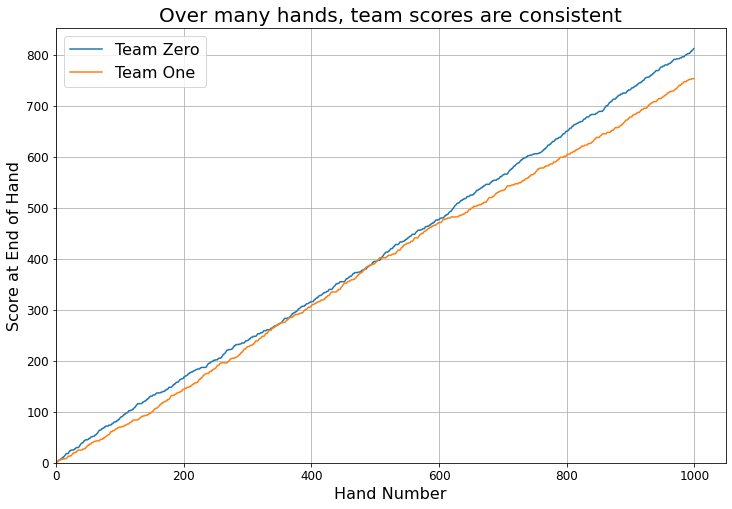

In [109]:
# plot the scores 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_scores, label = "Team Zero")
ax.plot(t1_scores, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title("Over many hands, team scores are consistent", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

In [110]:
# sample out n rounds m times
m_samples = 100
# generate the scores over n rounds 
n_rounds = 1000
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    random_table = Table(*random_players)
    for j in range(n_rounds):
        # play a hand
        random_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = random_table.get_scores()

In [111]:
#average scores across the trials
t0_score_avg = np.mean(t0_scores, axis = 0)
t1_score_avg = np.mean(t1_scores, axis = 0)

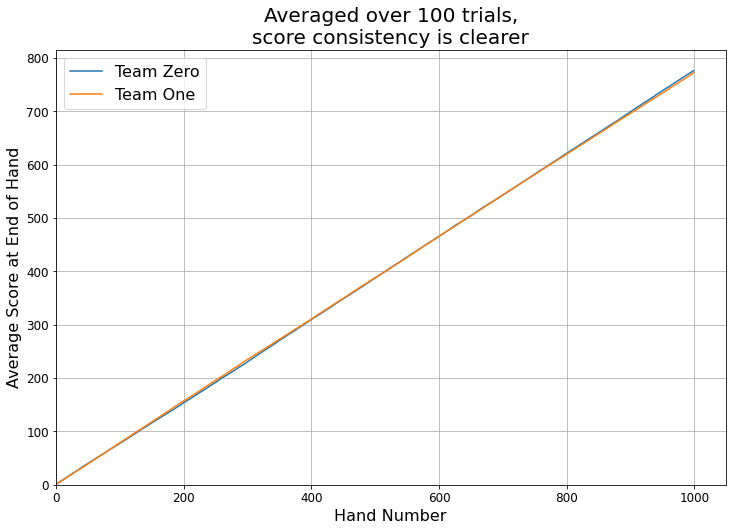

In [112]:
# plot the scores from the averaged trials 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg, label = "Team Zero")
ax.plot(t1_score_avg, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"Averaged over {m_samples} trials,\nscore consistency is clearer", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

## Fixing the Deal
When we force a single player to consistently deal, how does it impact scores? 

In [113]:
# sample out n rounds m times
m_samples = 100
# generate the scores over n rounds 
n_rounds = 1000
# fix the dealer to seat 0
dealer_seat = 0
t0_scores = np.zeros((m_samples, n_rounds))
t1_scores = np.zeros((m_samples, n_rounds))

for i in range(m_samples):
    #reset the table 
    random_table = Table(*random_players)
    for j in range(n_rounds):
        # force the deal to the assigned player
        random_table.dealer = dealer_seat
        # play a hand
        random_table.play_hand()
        # get and record current scores
        t0_scores[i,j],t1_scores[i, j]  = random_table.get_scores()

In [114]:
#average scores across the trials
t0_score_avg_d0 = np.mean(t0_scores, axis = 0)
t1_score_avg_d0 = np.mean(t1_scores, axis = 0)

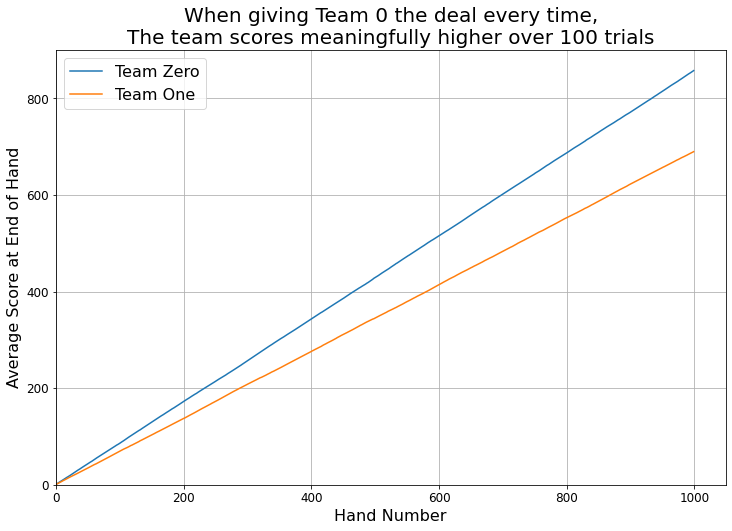

In [115]:
# plot the scores from the averaged trials 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(t0_score_avg_d0, label = "Team Zero")
ax.plot(t1_score_avg_d0, label = "Team One")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score at End of Hand", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"When giving Team 0 the deal every time,\nThe team scores meaningfully higher over {m_samples} trials", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Above, we see that starting with the deal dramatically improves the performance of the team with the deal. 

My current theory is that the dealing team, on average, should have more cards in the trump suit than the opposing team. Because pickup and later trump selection actions are taken without consideration of cards in hand,  picking up the kitty card gives the dealer's team, on average, more trump cards than the non-dealing team.

Key statistics:
- Odds of a single player calling 'pick up kitty' or setting trump : 25% 
- Odds of 'pick up kitty' by any player: 68.3%
- Odds of P0 or P2 calling pickup or picking trump: (3/16) + (27/256) + (243/4096) 
- Odds of P0 (dealer) being stuck: 0.75^7 = 2187/16384 ~ 13.3%
- Odds of P0 or P2 picking trump: ~48.6%

Even though P1 gets to play the first card each time (and theoretically gets *some* advantage due to the odds of winning if no other player plays trump or a card of the same suit with a higher value), it appears that this value doesn't beat out the benefit of 68.3% odds of a guaranteed trump card in hand (it's worth noting that this situation is made more complex by the dealer potentially discarding some other trump card upon pickup). 

Lastly, there's probably some benefit for the dealing team being less likely to call trump (48.6% vs 51.4%) - because of the scoring rules, the team that doesn't call trump only needs 3 trick wins to score two points (instead of 5 tricks).

## Varying Random Player Pick-Up/Trick Selection call rates with a consistent dealer
The baseline rate for calling 'pick up kitty' or selecting a trick is 25%. What happens if we modulate that?

In [125]:
n_action_proba = 11
action_proba = np.linspace(0,1,n_action_proba)
#sample out n rounds m times
m_samples = 100
# generate the scores over n rounds 
n_rounds = 1000

t0_scores = np.zeros((n_action_proba, m_samples, n_rounds))
t1_scores = np.zeros((n_action_proba, m_samples, n_rounds))

# fix the dealer to seat 0
dealer_seat = 0

for h, ap in enumerate(action_proba):
    print(f"Simulating games for probability {h+1} of {n_action_proba}")
    players_w_proba = [RandomPlayer(p, action_prob = ap) for p in range(4)]
    for i in range(m_samples):
        #reset the table 
        random_table = Table(*players_w_proba)
        for j in range(n_rounds):
            # force the deal to the assigned player
            random_table.dealer = dealer_seat
            # play a hand
            random_table.play_hand()
            # get and record current scores
            t0_scores[h,i,j],t1_scores[h,i,j]  = random_table.get_scores()

Simulating games for probability 1 of 11
Simulating games for probability 2 of 11
Simulating games for probability 3 of 11
Simulating games for probability 4 of 11
Simulating games for probability 5 of 11
Simulating games for probability 6 of 11
Simulating games for probability 7 of 11
Simulating games for probability 8 of 11
Simulating games for probability 9 of 11
Simulating games for probability 10 of 11
Simulating games for probability 11 of 11


In [126]:
#average scores across the trials
t0_score_avg_many_proba = np.mean(t0_scores, axis = 1)
t1_score_avg_many_proba = np.mean(t1_scores, axis = 1)

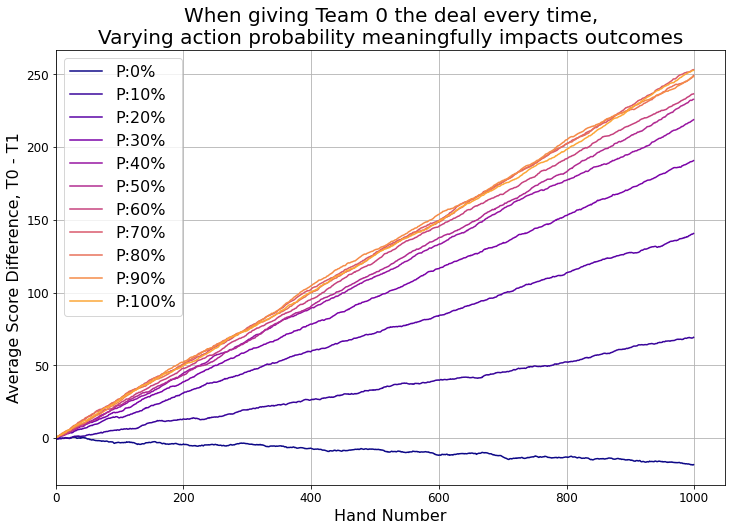

In [131]:
# plot the scores from the averaged trials 
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
# not using the entire color scale: yellows are hard for me to see
l_colors = cm.plasma(np.linspace(0,0.8, n_action_proba))
# for each probability, plot the difference between t0 and t1 scores over hands
for h, ap in enumerate(action_proba):
    score_differential = t0_score_avg_many_proba[h] - t1_score_avg_many_proba[h]
    ax.plot(score_differential, label = f"P:{ap:0.0%}", color=l_colors[h])

ax.set_xlim(left=0)

ax.set_xlabel("Hand Number", size = LABEL_FSIZE)
ax.set_ylabel("Average Score Difference, T0 - T1", size = LABEL_FSIZE)

for l in ax.get_xticklabels() + ax.get_yticklabels():
    l.set_fontsize(TICK_LABEL_FSIZE)

plt.title(f"When giving Team 0 the deal every time,\nVarying action probability meaningfully impacts outcomes", size = TITLE_FSIZE)
plt.legend(prop={'size': LEGEND_FSIZE})
plt.grid()
plt.show()

Above, we see that forcing the dealer to pick trump each time (P=0%) leads to a higher average score for Team 1 over many hands, indicating that there's some benefit to going first (as the dealing team doesn't get the benefit of a guaranteed trump card from kitty pickup). Quickly though, that value is washed out - even at a 10% pickup rate (where the dealer is stuck 48% of the time), Team zero scores ~0.07 points per hand more. At extreme values of the action probabiltiy (near 1), we see that the average scores are nearly 0.25 points per hand higher, which is a dramatic difference when 1-2 points is achievable per hand. 